In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics

In [2]:
from sklearn.naive_bayes import GaussianNB

In [8]:
col_names = ["Cultivator", "Alchol", "Malic Acid", "Ash", "Alcalinity_of_Ash", "Magnesium", "Total_Phenols", "Flavanoids", "Nonflavanoid_Phenols",
            "Proanthoncyanins", "Color_Intensity", "Hue", "OD280", "Proline"]
wine_df = pd.read_csv('wine.data', names=col_names)
wine_df.head()

Cultivator  Alchol  Malic Acid   Ash  Alcalinity_of_Ash  Magnesium   
0           1   14.23        1.71  2.43               15.6        127  \
1           1   13.20        1.78  2.14               11.2        100   
2           1   13.16        2.36  2.67               18.6        101   
3           1   14.37        1.95  2.50               16.8        113   
4           1   13.24        2.59  2.87               21.0        118   

   Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthoncyanins   
0           2.80        3.06                  0.28              2.29  \
1           2.65        2.76                  0.26              1.28   
2           2.80        3.24                  0.30              2.81   
3           3.85        3.49                  0.24              2.18   
4           2.80        2.69                  0.39              1.82   

   Color_Intensity   Hue  OD280  Proline  
0             5.64  1.04   3.92     1065  
1             4.38  1.05   3.40     1050  
2             5.68  1.03   3.17     1185  
3             7.80  0.86   3.45     1480  
4             4.32  1.04   2.93      735

In [9]:
wine_df.describe().transpose()

count        mean         std     min       25%   
Cultivator            178.0    1.938202    0.775035    1.00    1.0000  \
Alchol                178.0   13.000618    0.811827   11.03   12.3625   
Malic Acid            178.0    2.336348    1.117146    0.74    1.6025   
Ash                   178.0    2.366517    0.274344    1.36    2.2100   
Alcalinity_of_Ash     178.0   19.494944    3.339564   10.60   17.2000   
Magnesium             178.0   99.741573   14.282484   70.00   88.0000   
Total_Phenols         178.0    2.295112    0.625851    0.98    1.7425   
Flavanoids            178.0    2.029270    0.998859    0.34    1.2050   
Nonflavanoid_Phenols  178.0    0.361854    0.124453    0.13    0.2700   
Proanthoncyanins      178.0    1.590899    0.572359    0.41    1.2500   
Color_Intensity       178.0    5.058090    2.318286    1.28    3.2200   
Hue                   178.0    0.957449    0.228572    0.48    0.7825   
OD280                 178.0    2.611685    0.709990    1.27    1.9375   
Proline               178.0  746.893258  314.907474  278.00  500.5000   

                          50%       75%      max  
Cultivator              2.000    3.0000     3.00  
Alchol                 13.050   13.6775    14.83  
Malic Acid              1.865    3.0825     5.80  
Ash                     2.360    2.5575     3.23  
Alcalinity_of_Ash      19.500   21.5000    30.00  
Magnesium              98.000  107.0000   162.00  
Total_Phenols           2.355    2.8000     3.88  
Flavanoids              2.135    2.8750     5.08  
Nonflavanoid_Phenols    0.340    0.4375     0.66  
Proanthoncyanins        1.555    1.9500     3.58  
Color_Intensity         4.690    6.2000    13.00  
Hue                     0.965    1.1200     1.71  
OD280                   2.780    3.1700     4.00  
Proline               673.500  985.0000  1680.00

In [11]:
wine_df.shape

(178, 14)

In [12]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cultivator            178 non-null    int64  
 1   Alchol                178 non-null    float64
 2   Malic Acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity_of_Ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total_Phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid_Phenols  178 non-null    float64
 9   Proanthoncyanins      178 non-null    float64
 10  Color_Intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280                 178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


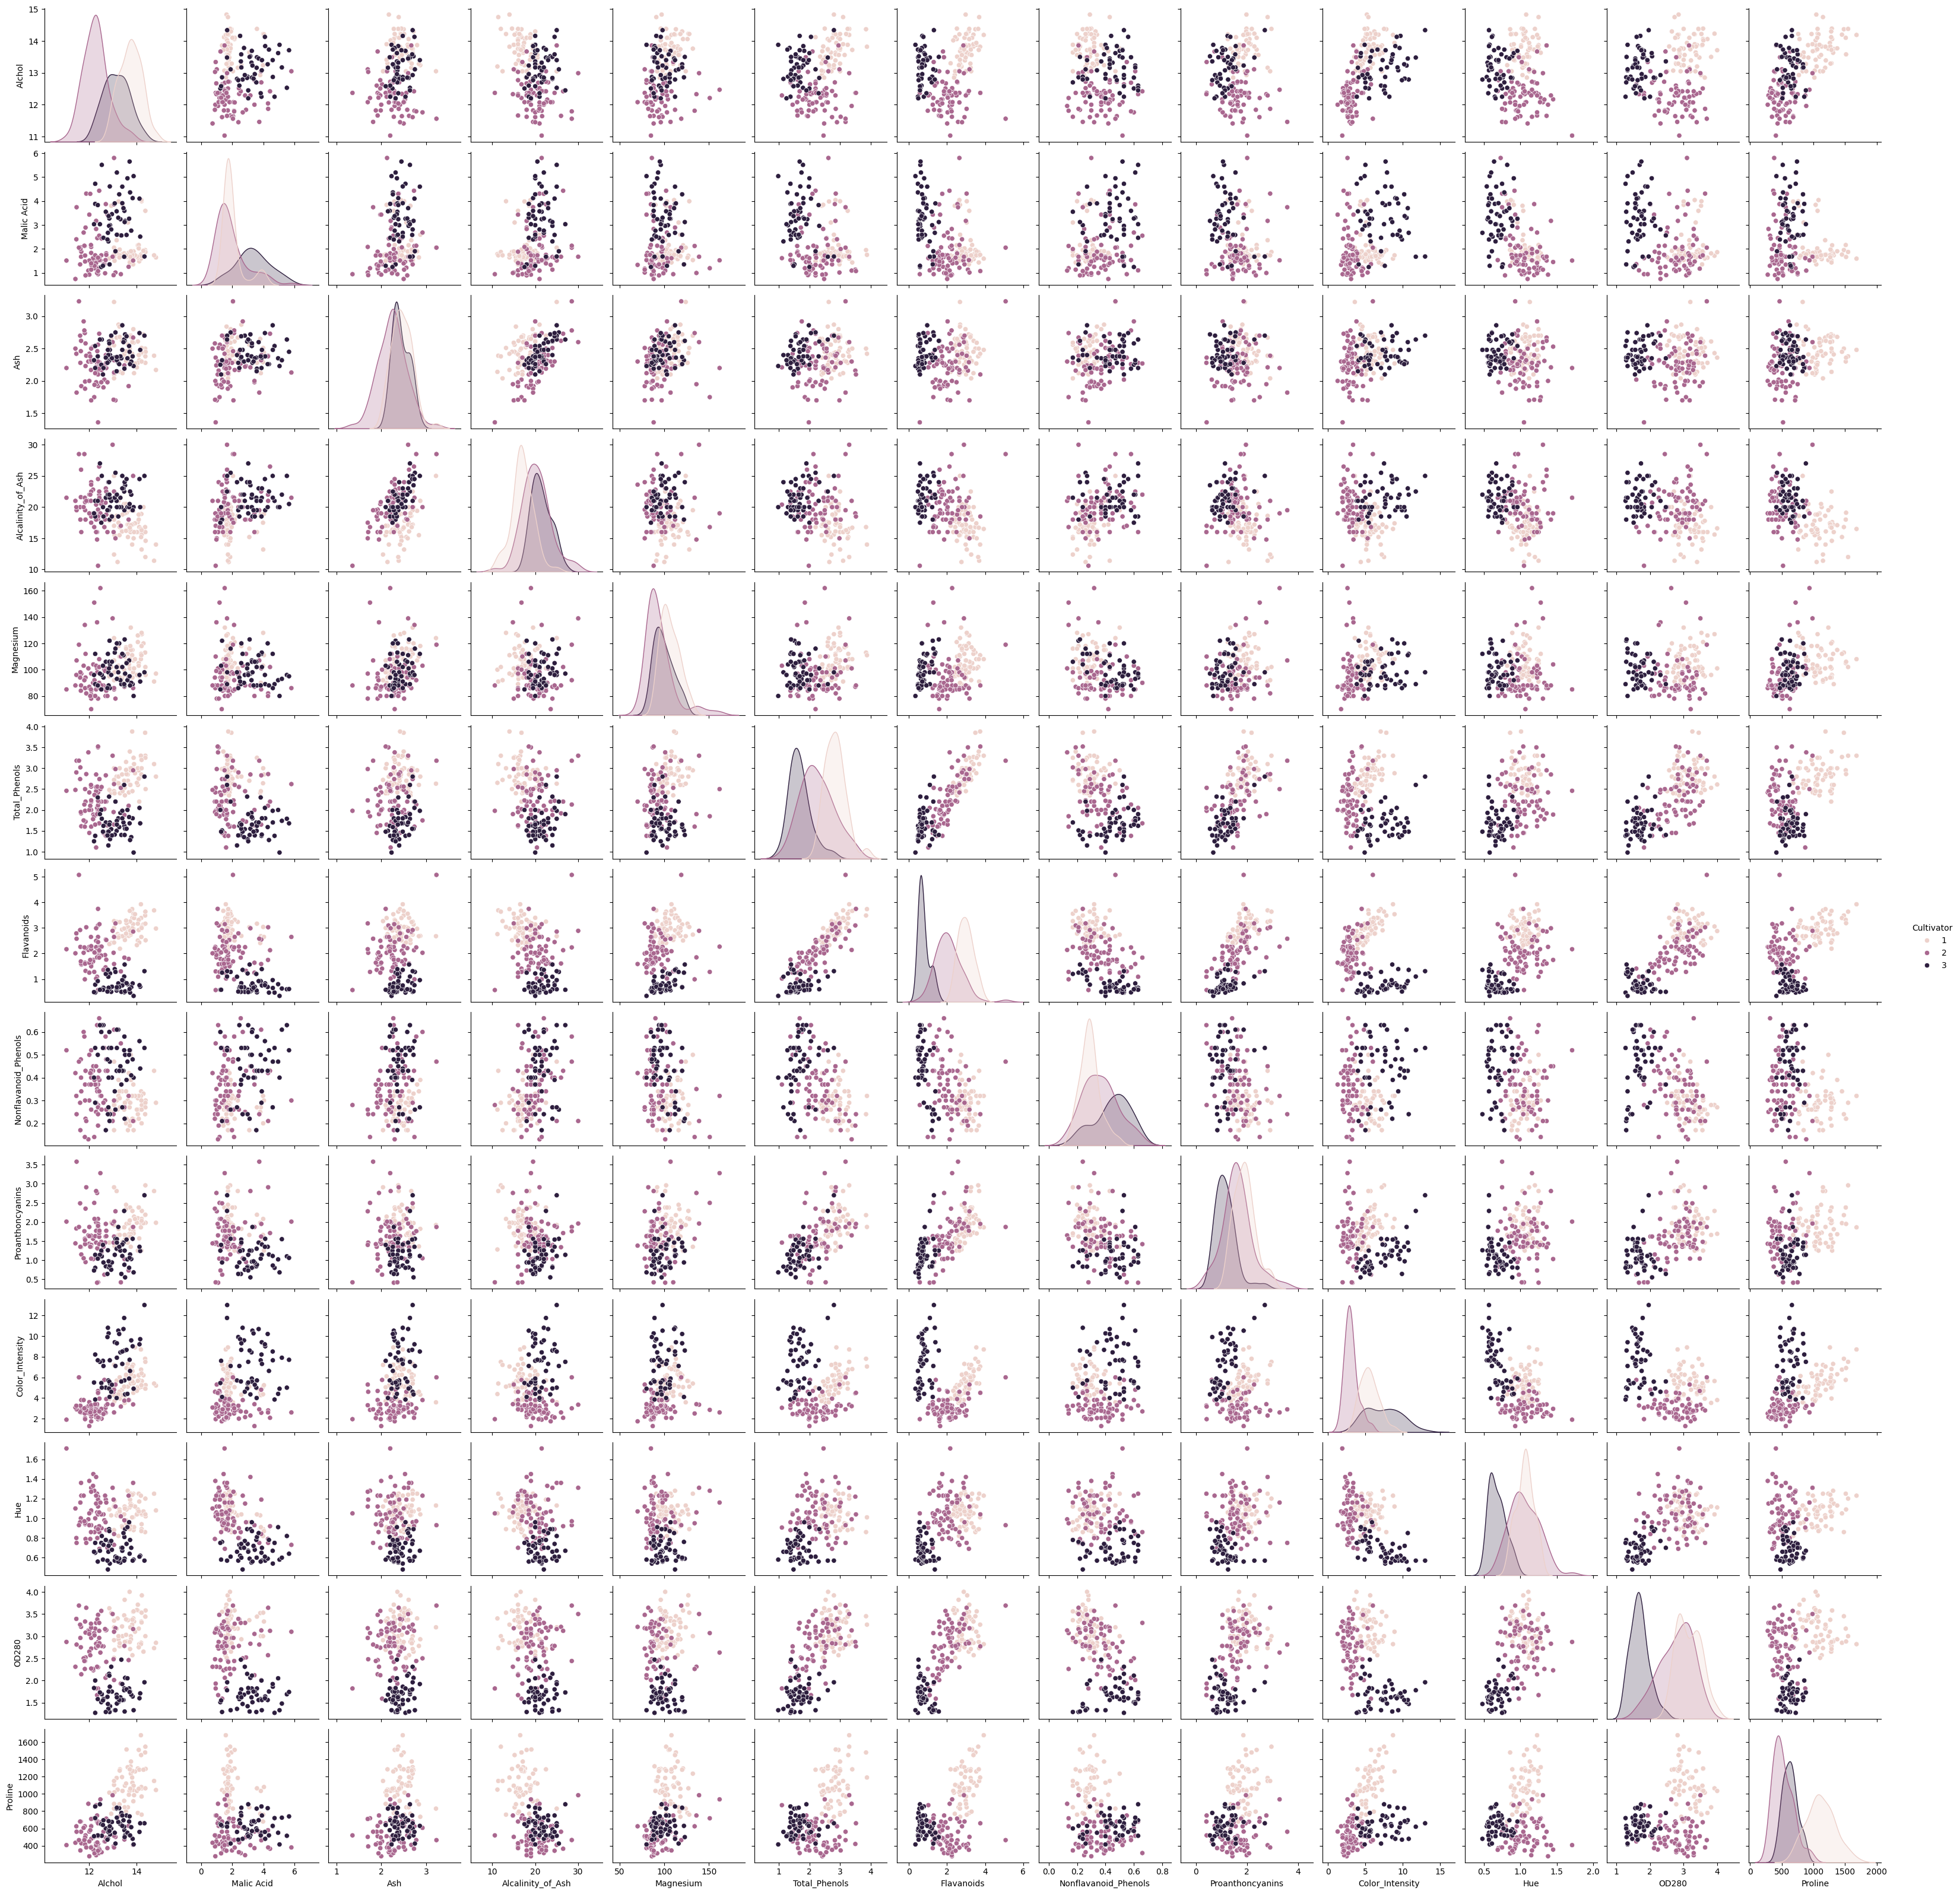

In [13]:
import seaborn as sns

sns.pairplot(wine_df, diag_kind="kde", hue="Cultivator")

In [14]:
#Splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X = wine_df.drop("Cultivator", axis=1)
Y = wine_df.pop("Cultivator")

In [15]:
X.head()

Alchol  Malic Acid   Ash  Alcalinity_of_Ash  Magnesium  Total_Phenols   
0   14.23        1.71  2.43               15.6        127           2.80  \
1   13.20        1.78  2.14               11.2        100           2.65   
2   13.16        2.36  2.67               18.6        101           2.80   
3   14.37        1.95  2.50               16.8        113           3.85   
4   13.24        2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthoncyanins  Color_Intensity   Hue   
0        3.06                  0.28              2.29             5.64  1.04  \
1        2.76                  0.26              1.28             4.38  1.05   
2        3.24                  0.30              2.81             5.68  1.03   
3        3.49                  0.24              2.18             7.80  0.86   
4        2.69                  0.39              1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

In [16]:
train_set, test_set, train_labels, test_labels = train_test_split(X, Y, test_size=0.30, random_state=1)

In [17]:
#Invokin the NB Gaussian function to create the model
#Fitting the model in the training data set

model = GaussianNB()
model.fit(train_set, train_labels)

GaussianNB()

In [18]:
model.score(train_set, train_labels)

0.9758064516129032

In [19]:
test_pred = model.predict(test_set)

print(metrics.classification_report(test_labels, test_pred))
print(metrics.confusion_matrix(test_labels, test_pred))

              precision    recall  f1-score   support

           1       0.96      1.00      0.98        23
           2       1.00      0.95      0.97        19
           3       1.00      1.00      1.00        12

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

[[23  0  0]
 [ 1 18  0]
 [ 0  0 12]]


K-Fold Cross Validation - Use this technique when number of datapoints is less

Take average scores to get overall average

In [35]:
from sklearn.model_selection import cross_val_score, cross_val_predict

scores = cross_val_score(model, train_set, train_labels, cv=10)
print("Cross-validated scores:", scores, scores)
print("Average score:", np.average(scores))

Cross-validated scores: [1.         0.92307692 1.         1.         0.91666667 1.
 0.91666667 1.         1.         0.91666667] [1.         0.92307692 1.         1.         0.91666667 1.
 0.91666667 1.         1.         0.91666667]
Average score: 0.9673076923076922
